# Simulations Metrics and Calculations

In [1]:
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt

Import .py file with very useful functions :D

In [2]:
import Calculations_Functions

Simulation File

In [3]:
filename0 = '/home/vvalenzuela/MOAD/Ocean_Parcels/results/Simulations_runs/PBDE_particles_for_0112022_run_365_days_no_buried_tau_crit_1e-2_upwards_testing.zarr'
filename1 = '/home/vvalenzuela/MOAD/Ocean_Parcels/results/Simulations_runs/PBDE_particles_for_0112022_run_365_days_updated_ratio_year_simulation.zarr'
filename2 = '/home/vvalenzuela/MOAD/Ocean_Parcels/results/Simulations_runs/PBDE_particles_for_0112022_run_365_days_kernel_updated.zarr'
filename3 = '/home/vvalenzuela/MOAD/Ocean_Parcels/results/Simulations_runs/PBDE_particles_for_0112022_run_365_days_updated_UV_fieldset.zarr'
filename4 = '/home/vvalenzuela/MOAD/Ocean_Parcels/results/Simulations_runs/PBDE_particles_for_0112022_run_365_days_full_kernels_tau_0_025_ratio_0_2_sv_5.zarr'

In [4]:
data0 = Calculations_Functions.proportions_from_filename(filename0)
data1 = Calculations_Functions.proportions_from_filename(filename1)
data2 = Calculations_Functions.proportions_from_filename(filename2)
data3 = Calculations_Functions.proportions_from_filename(filename3)
data4 = Calculations_Functions.proportions_from_filename(filename4)

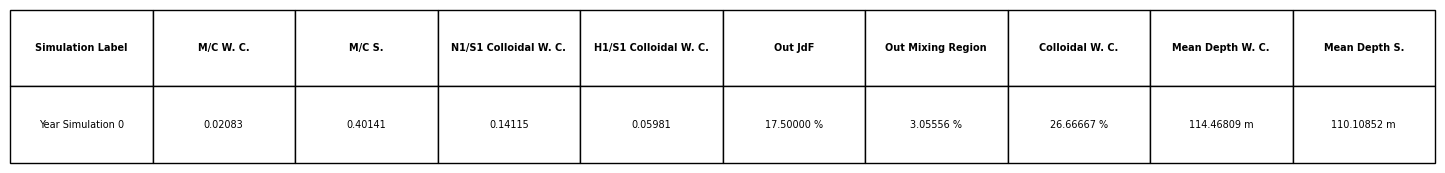

In [5]:
tabla0 = Calculations_Functions.metrics_table(filename0, title = 'Year Simulation 0')

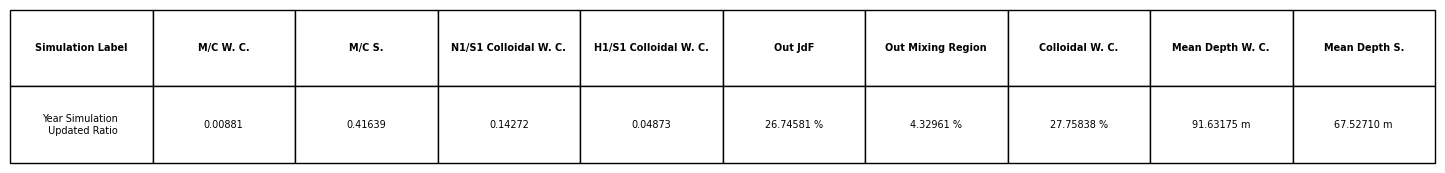

In [6]:
tabla1 = Calculations_Functions.metrics_table(filename1, title = 'Year Simulation \n Updated Ratio')

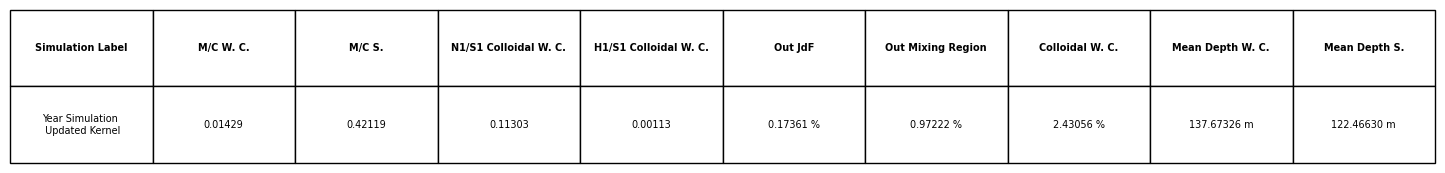

In [7]:
tabla2 = Calculations_Functions.metrics_table(filename2, title = 'Year Simulation \n Updated Kernel')

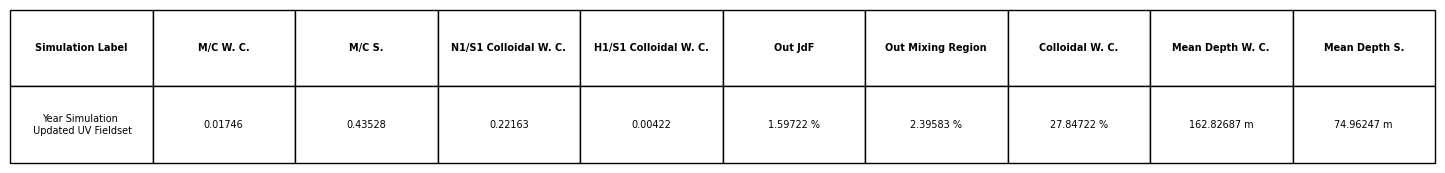

In [8]:
tabla3 = Calculations_Functions.metrics_table(filename3, title = 'Year Simulation \n Updated UV Fieldset')

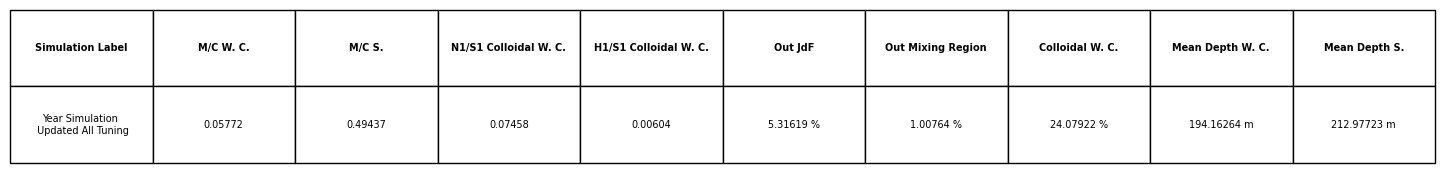

In [9]:
tabla4 = Calculations_Functions.metrics_table(filename4, title = 'Year Simulation \n Updated All Tuning')

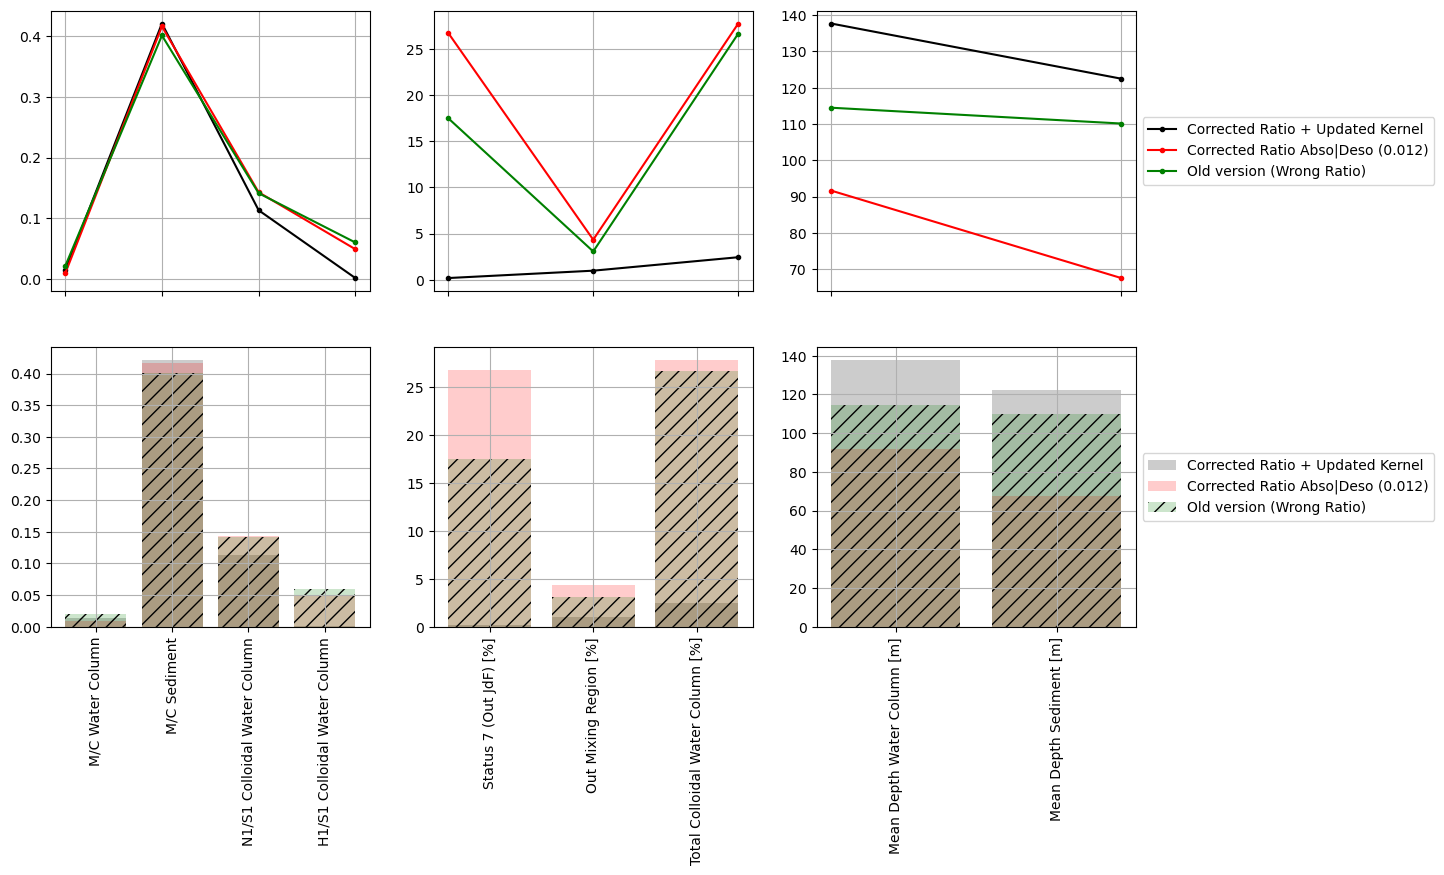

In [27]:
fig, ax = plt.subplots(2,3,figsize = (14,8))
#
ax[0,0].plot(tabla2.columns[1:5], tabla2.loc[0].values[1:5],'.-k', label = 'Corrected Ratio + Updated Kernel')
ax[0,0].plot(tabla1.columns[1:5], tabla1.loc[0].values[1:5],'.-r', label = 'Corrected Ratio Abso|Deso (0.012)')
ax[0,0].plot(tabla0.columns[1:5], tabla0.loc[0].values[1:5],'.-g', label = 'Old version (Wrong Ratio)')

#
ax[0,1].plot(tabla2.columns[5:8], tabla2.loc[0].values[5:8],'.-k', label = 'Corrected Ratio + Updated Kernel')
ax[0,1].plot(tabla1.columns[5:8], tabla1.loc[0].values[5:8], '.-r',label = 'Corrected Ratio Abso|Deso (0.012)')
ax[0,1].plot(tabla0.columns[5:8], tabla0.loc[0].values[5:8],'.-g', label = 'Old version (Wrong Ratio)')

#
ax[0,2].plot(tabla2.columns[8:], tabla2.loc[0].values[8:],'.-k', label = 'Corrected Ratio + Updated Kernel')
ax[0,2].plot(tabla1.columns[8:], tabla1.loc[0].values[8:], '.-r',label = 'Corrected Ratio Abso|Deso (0.012)')
ax[0,2].plot(tabla0.columns[8:], tabla0.loc[0].values[8:],'.-g', label = 'Old version (Wrong Ratio)')
#
ax[0,2].legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
for ax_i in ax[0]:
    ax_i.set_xticklabels([])
#
ax[1,0].bar(tabla2.columns[1:5], tabla2.loc[0].values[1:5],color = 'k', alpha = .2, label = 'Corrected Ratio + Updated Kernel')
ax[1,0].bar(tabla1.columns[1:5], tabla1.loc[0].values[1:5],color = 'r', alpha = .2, label = 'Corrected Ratio Abso|Deso (0.012)')
ax[1,0].bar(tabla0.columns[1:5], tabla0.loc[0].values[1:5],color = 'g', hatch = '//', alpha = .2, label = 'Old version (Wrong Ratio)')

#
ax[1,1].bar(tabla2.columns[5:8], tabla2.loc[0].values[5:8],color = 'k', alpha = .2, label = 'Corrected Ratio + Updated Kernel')
ax[1,1].bar(tabla1.columns[5:8], tabla1.loc[0].values[5:8],color = 'r', alpha = .2, label = 'Corrected Ratio Abso|Deso (0.012)')
ax[1,1].bar(tabla0.columns[5:8], tabla0.loc[0].values[5:8],color = 'g', hatch = '//', alpha = .2, label = 'Old version (Wrong Ratio)')

#
ax[1,2].bar(tabla2.columns[8:], tabla2.loc[0].values[8:],color = 'k', alpha = .2, label = 'Corrected Ratio + Updated Kernel')
ax[1,2].bar(tabla1.columns[8:], tabla1.loc[0].values[8:],color = 'r', alpha = .2 , label = 'Corrected Ratio Abso|Deso (0.012)')
ax[1,2].bar(tabla0.columns[8:], tabla0.loc[0].values[8:],color = 'g', hatch = '//', alpha = .2, label = 'Old version (Wrong Ratio)')
#
ax[1,2].legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
for ax_i in ax.flatten():
    ax_i.tick_params(axis='x', rotation=90)
    ax_i.grid()

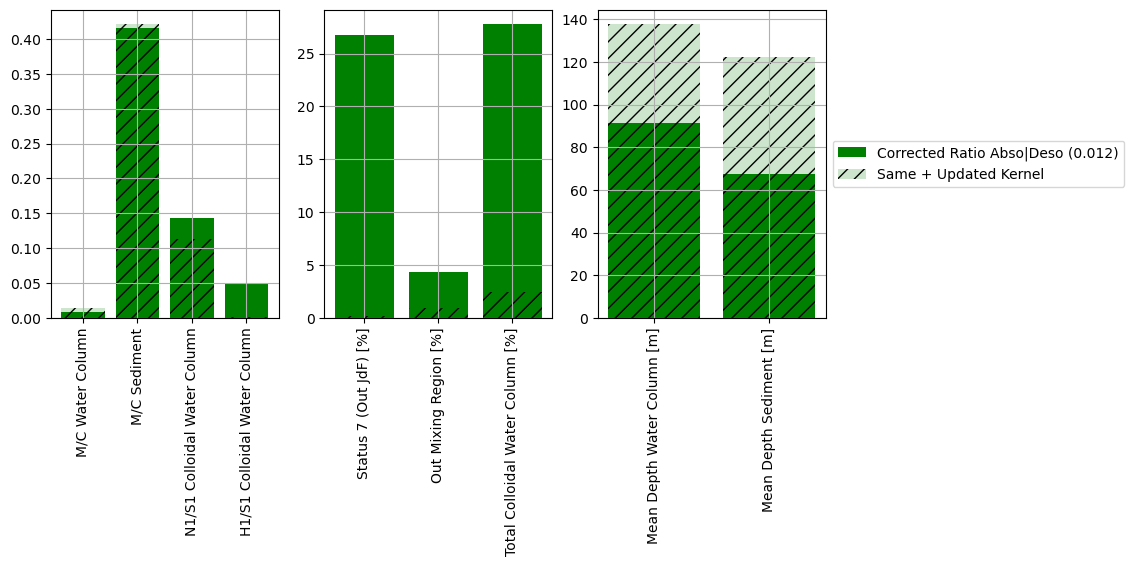

In [9]:
fig, ax = plt.subplots(1,3,figsize = (10,4))
ax[0].bar(tabla1.columns[1:5], tabla1.loc[0].values[1:5],color = 'g', label = 'Corrected Ratio Abso|Deso (0.012)')
ax[0].bar(tabla2.columns[1:5], tabla2.loc[0].values[1:5],color = 'g', hatch = '//', alpha = .2, label = 'Same + Updated Kernel')
#
ax[1].bar(tabla1.columns[5:8], tabla1.loc[0].values[5:8],color = 'g', label = 'Corrected Ratio Abso|Deso (0.012)')
ax[1].bar(tabla2.columns[5:8], tabla2.loc[0].values[5:8],color = 'g', hatch = '//', alpha = .2, label = 'Same + Updated Kernel')
#
ax[2].bar(tabla1.columns[8:], tabla1.loc[0].values[8:],color = 'g', label = 'Corrected Ratio Abso|Deso (0.012)')
ax[2].bar(tabla2.columns[8:], tabla2.loc[0].values[8:],color = 'g', hatch = '//', alpha = .2, label = 'Same + Updated Kernel')
#
ax[2].legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
for ax_i in ax:
    ax_i.tick_params(axis='x', rotation=90)
    ax_i.grid()

- M/C Water Column ---> 0.012
- N1/S1 Water Column ---> 0.108 (- 0.027 | + 0.13)

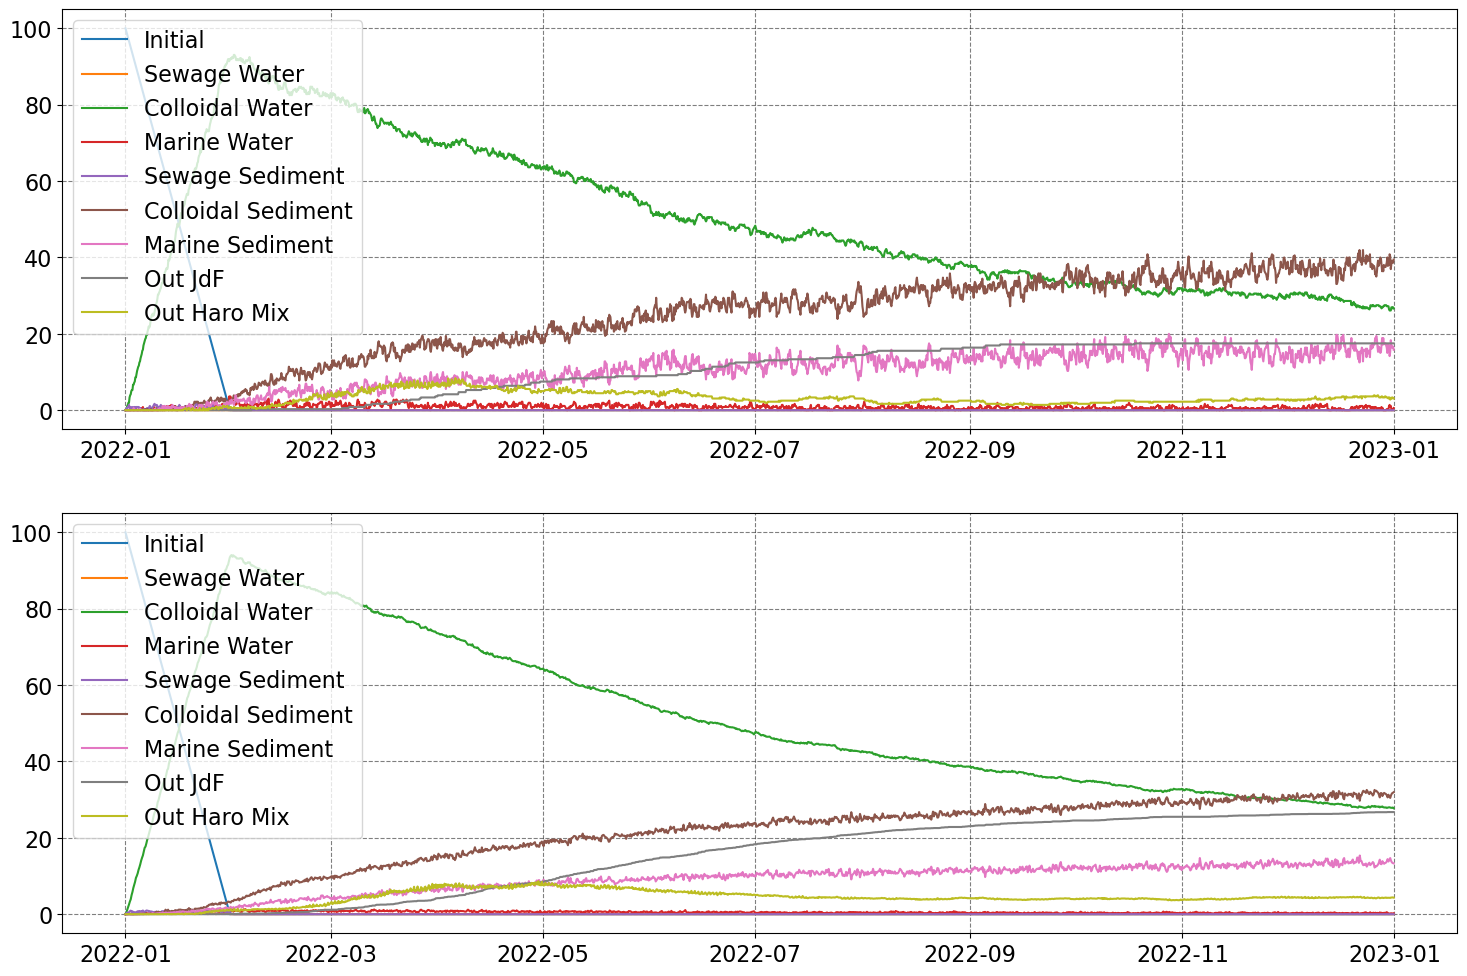

In [8]:
plt.rcParams.update({'font.size': 16})
fig, ax = plt.subplots(2,1,figsize = (18,12))
ax[0].plot(data0, label = data0.columns)
ax[0].legend()
ax[0].grid(c='k', alpha = 0.5, linestyle = '--')
#
ax[1].plot(data1, label = data1.columns)
ax[1].legend()
ax[1].grid(c='k', alpha = 0.5, linestyle = '--')

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'Initial'),
  Text(1, 0, 'Sewage Water'),
  Text(2, 0, 'Colloidal Water'),
  Text(3, 0, 'Marine Water'),
  Text(4, 0, 'Sewage Sediment'),
  Text(5, 0, 'Colloidal Sediment'),
  Text(6, 0, 'Marine Sediment'),
  Text(7, 0, 'Out JdF'),
  Text(8, 0, 'Out Haro Mix')])

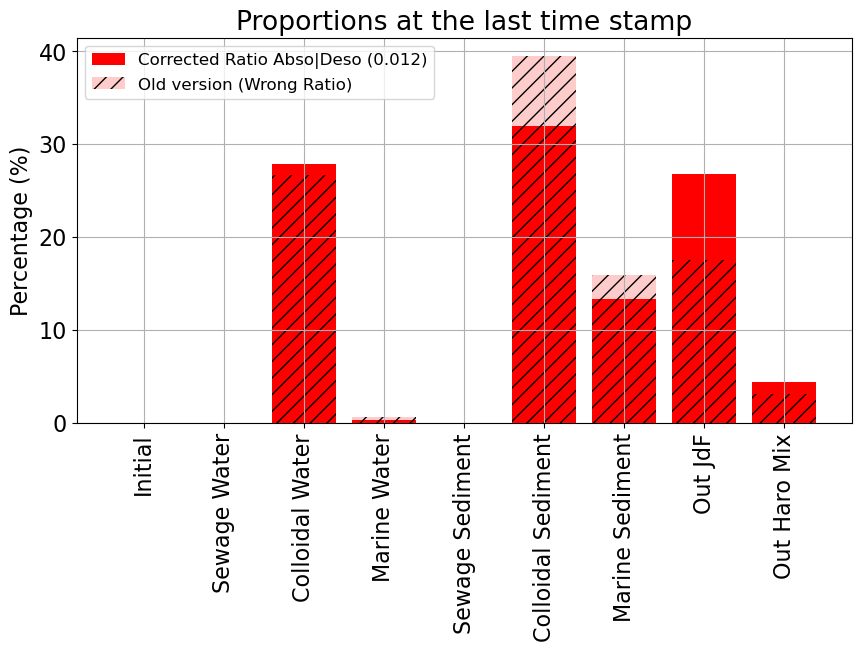

In [9]:
fig, ax = plt.subplots(figsize = (10,5))
ax.bar(data1.columns, data1.iloc[-1].values, color = 'r', label = 'Corrected Ratio Abso|Deso (0.012)')
ax.bar(data0.columns, data0.iloc[-1].values, color = 'r', hatch = '//', alpha = .2, label = 'Old version (Wrong Ratio)')
ax.legend(fontsize = 12)
ax.set_ylabel('Percentage (%)')
ax.set_title('Proportions at the last time stamp')
ax.grid()
plt.xticks(rotation=90)

Text(0.5, 1.0, 'M/C Ratio')

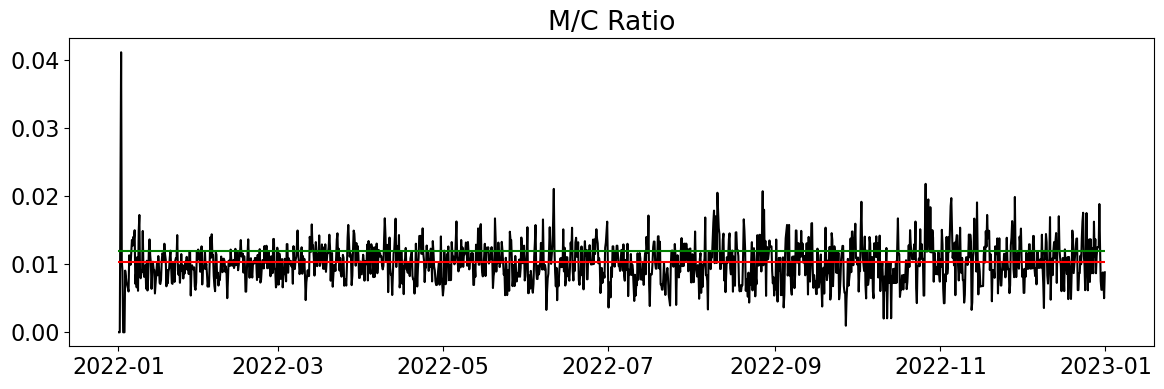

In [10]:
fig, ax = plt.subplots(figsize = (14,4))
ax.plot(data1['Marine Water'] / data1['Colloidal Water'], 'k')
ax.hlines((data1['Marine Water'][124:-1] / data1['Colloidal Water'][124:-1]).mean(), xmin = data1.index.min(), xmax = data1.index.max(), color = 'r')
ax.hlines(0.012, xmin = data1.index.min(), xmax = data1.index.max(), color = 'g')
ax.set_title('M/C Ratio')
#

Tests to add a new metric! :D

In [11]:
datitos = xr.open_dataset(filename1)

/home/vvalenzuela/conda_envs/Parcels/lib/python3.11/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'netcdf4' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/home/vvalenzuela/conda_envs/Parcels/lib/python3.11/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'scipy' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)


In [12]:
out_jdf = datitos.where((datitos.lat < 48.7) & (datitos.lon <= -124.66))

In [13]:
out_haro_mix_0 = datitos.where((datitos.lat <= 48.46) & (datitos.lon <= -122) & (datitos.lon > -124.66))#& (datitos.lat >= 48.43) & (datitos.lon >= -123.4) & (datitos.lon <= -123))

In [14]:
out_haro_mix_1 = datitos.where((datitos.lat < 48.7) & (datitos.lat > 48.46) & (datitos.lon > -124.66) & (datitos.lon < -124))#& (datitos.lat >= 48.43) & (datitos.lon >= -123.4) & (datitos.lon <= -123))

/tmp/ipykernel_752013/1465033379.py:10: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  plt.pcolormesh(mask['nav_lon'], mask['nav_lat'], mask['tmask'][0][0], cmap = cmap)


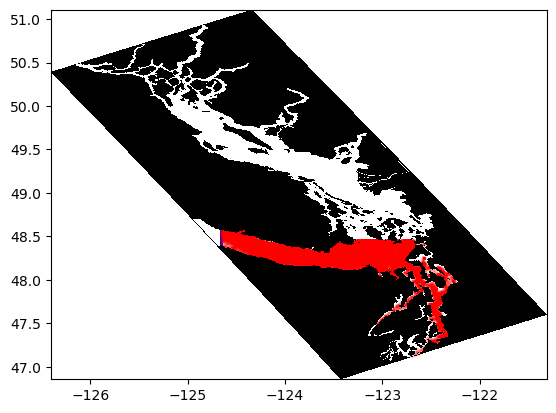

In [15]:
from matplotlib.colors import ListedColormap
colors = [(0, 0, 0, 1),  # Black for land (1)
          (0, 0, 0, 0)]  # Transparent for water (0)
cmap = ListedColormap(colors)
mask = xr.open_dataset('/ocean/vvalenzuela/MOAD/grid2/mesh_mask202108_TDV.nc')
plt.rcParams.update({'font.size': 10})
plt.scatter(out_jdf.lon, out_jdf.lat, c = 'b', s = 1, alpha = .05)
plt.scatter(out_haro_mix_0.lon, out_haro_mix_0.lat, c = 'r', s = 1, alpha = .05)
plt.scatter(out_haro_mix_1.lon, out_haro_mix_1.lat, c = 'r', s = 1, alpha = .05)
plt.pcolormesh(mask['nav_lon'], mask['nav_lat'], mask['tmask'][0][0], cmap = cmap)

#plt.scatter(m_region.lon, m_region.lat, c = 'g', s = 1, alpha = .05)

/tmp/ipykernel_752013/2264335957.py:3: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  ax.pcolormesh(mask['nav_lon'], mask['nav_lat'], mask['tmask'][0][0], cmap = cmap)


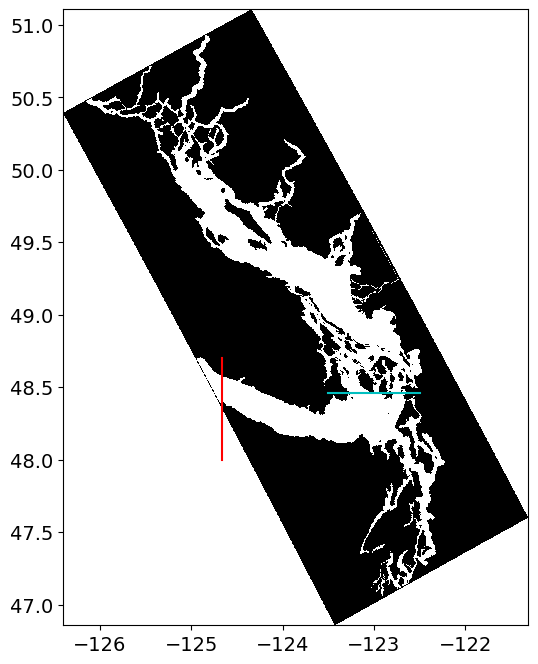

In [16]:
plt.rcParams.update({'font.size': 14})
fig, ax = plt.subplots(figsize = (6,8))
ax.pcolormesh(mask['nav_lon'], mask['nav_lat'], mask['tmask'][0][0], cmap = cmap)
ax.plot(-124.66 * np.ones(200), np.linspace(48,48.7, 200), 'r')
ax.plot(np.linspace(-123.5,-122.5, 200), 48.46 * np.ones(200), 'c')
#ax.plot(np.linspace(-124.66,-124, 200), 48.7 * np.ones(200), 'c')
#ax.plot(-124 * np.ones(200), np.linspace(48,48.7, 200), 'c')

#ax.plot(-123 * np.ones(200), np.linspace(48,48.7, 200), 'c')


In [17]:
data = datitos

colloidal_water = []
marine_water = [] 
sewage_water = []
initial = []
colloidal_sediment = []
marine_sediment = []
sewage_sediment = []
particles_out = []
status_7 = []
total = []
after_mix_0 = []
after_mix_1 = []


for i in range(len(data.obs)):
    # Extract column vectors
    status_i = data.status[:, i].values
    lat_i = data.lat[:, i].values
    lon_i = data.lon[:, i].values

    valid_status = np.isfinite(status_i)
    valid_pos = np.isfinite(lat_i) & np.isfinite(lon_i)

    # Counts by status
    len_initial = np.count_nonzero(valid_status & (status_i < 0))
    len_1 = np.count_nonzero(valid_status & (status_i == 1))
    len_2 = np.count_nonzero(valid_status & (status_i == 2))
    len_3 = np.count_nonzero(valid_status & (status_i == 3))
    len_11 = np.count_nonzero(valid_status & (status_i == 11))
    len_12 = np.count_nonzero(valid_status & (status_i == 12))
    len_13 = np.count_nonzero(valid_status & (status_i == 13))
    len_out = np.count_nonzero(valid_status & (status_i == 7))

    # Count status 7 in specific location (lat < 48.7 and lon < -124.66)
    condition_7 = (lat_i < 48.7) & (lon_i < -124.66)
    len_status_7 = np.count_nonzero(valid_pos & condition_7)
    #
    condition_haro_mix_0 = (lat_i <= 48.46) & (lon_i <= -122) & (lon_i > -124.66)
    len_haro_mix_0 = np.count_nonzero(valid_pos & condition_haro_mix_0)
    #
    condition_haro_mix_1 = (lat_i < 48.7) & (lat_i > 48.46) & (lon_i > -124.66) & (lon_i < -124)
    len_haro_mix_1 = np.count_nonzero(valid_pos & condition_haro_mix_1)    
    #
    # Total finite status
    len_T = np.count_nonzero(valid_status)

    # Append results
    colloidal_water.append(len_2)
    marine_water.append(len_3) 
    sewage_water.append(len_1)
    initial.append(len_initial)
    colloidal_sediment.append(len_12)
    marine_sediment.append(len_13)
    sewage_sediment.append(len_11)
    particles_out.append(len_out)
    status_7.append(len_status_7)    
    total.append(len_T)
    after_mix_0.append(len_haro_mix_0) 
    after_mix_1.append(len_haro_mix_1)    
    
    

# Convert to proportions
total_arr = np.array(total)
proportion_initial = np.array(initial) / total_arr
p_colloidal_water = np.array(colloidal_water) / total_arr
p_marine_water = np.array(marine_water) / total_arr
p_sewage_water = np.array(sewage_water) / total_arr
p_colloidal_sediment = np.array(colloidal_sediment) / total_arr
p_marine_sediment = np.array(marine_sediment) / total_arr
p_sewage_sediment = np.array(sewage_sediment) / total_arr
p_out = np.array(particles_out) / total_arr
p_status_7 = np.array(status_7) / total_arr
p_haro_mix_0 = np.array(after_mix_0) / total_arr
p_haro_mix_1 = np.array(after_mix_1) / total_arr
p_haro_mix = p_haro_mix_0 + p_haro_mix_1

In [18]:
time = datitos.time[0,:]

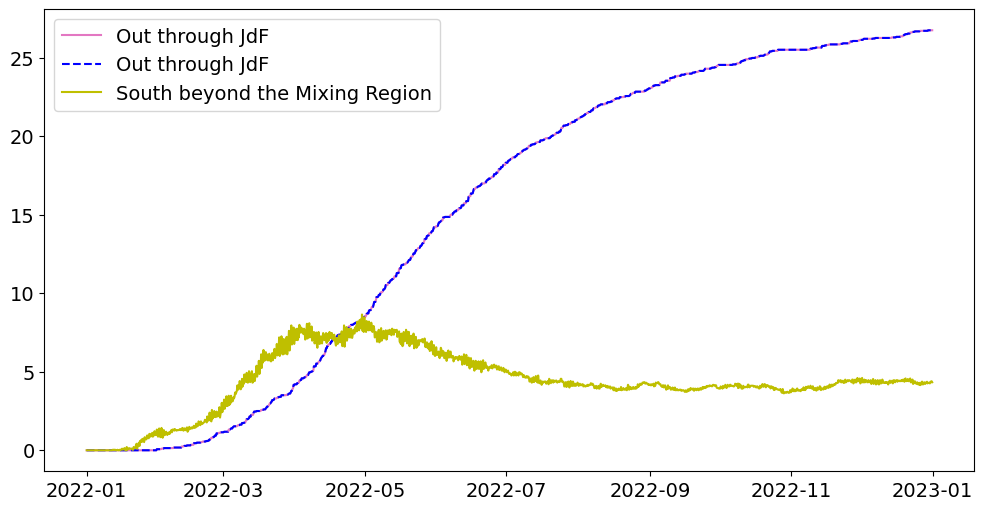

In [19]:
fig, ax = plt.subplots(figsize = (12,6))
ax.plot(time,p_out * 100, 'tab:pink', label = 'Out through JdF')
ax.plot(time,p_status_7 * 100, '--b', label = 'Out through JdF')

ax.plot(time,p_haro_mix * 100, 'y', label = 'South beyond the Mixing Region')
ax.legend()

In [20]:
print(f'Percentage of Particles after the mixing region: {np.round(p_haro_mix[-1]* 100, 2)} %')
print(f'Percentage of Particles that left the system through JdF Strait: {np.round(p_out[-1]* 100, 2)} %')

Percentage of Particles after the mixing region: 4.33 %
Percentage of Particles that left the system through JdF Strait: 26.75 %


In [21]:
def haro_jdf_exchange_percentages(data):
    n_particles = data.dims['trajectory']
    n_steps = data.dims['obs']

    #masks
    in_haro = np.zeros(n_particles, dtype=bool)
    in_jdf = np.zeros(n_particles, dtype=bool)
    in_mix = np.zeros(n_particles, dtype=bool)

    for i in range(n_steps):
        lat_i = data.lat[:, i].values
        lon_i = data.lon[:, i].values
        valid = np.isfinite(lat_i) & np.isfinite(lon_i)

        # Haro region: -124.66 ≤ lon < -123, lat < 48.47
        haro_cond = (lat_i <= 48.46) & (lat_i >= 48.43) & (lon_i >= -123.4) & (lon_i <= -123) & valid
        in_haro |= haro_cond

        # JdF region: lon < -124.66, lat < 48.7
        jdf_cond = (lat_i < 48.7) & (lon_i < -124.66) & valid
        in_jdf |= jdf_cond

        # Mix region: lon ≥ -123, lat < 48.47
        mix_cond = (lat_i < 48.46) & (lat_i > 48.43) & (lon_i > -123) & valid
        in_mix |= mix_cond

    # Intersections 
    haro_and_jdf = in_haro & in_jdf
    jdf_and_haro = haro_and_jdf

    mix_and_jdf = in_mix & in_jdf
    jdf_and_mix = mix_and_jdf

    # Totals
    haro_total = np.count_nonzero(in_haro)
    jdf_total = np.count_nonzero(in_jdf)
    mix_total = np.count_nonzero(in_mix)

    # Percentages
    percent_haro_to_jdf = (np.count_nonzero(haro_and_jdf) / haro_total) * 100 if haro_total > 0 else np.nan
    percent_jdf_to_haro = (np.count_nonzero(jdf_and_haro) / jdf_total) * 100 if jdf_total > 0 else np.nan
    percent_mix_to_jdf = (np.count_nonzero(mix_and_jdf) / mix_total) * 100 if mix_total > 0 else np.nan
    percent_jdf_to_mix = (np.count_nonzero(jdf_and_mix) / jdf_total) * 100 if jdf_total > 0 else np.nan

    return percent_haro_to_jdf, percent_jdf_to_haro, percent_mix_to_jdf, percent_jdf_to_mix


In [22]:
haro_to_jdf, jdf_to_haro, mix_to_jdf, jdf_to_mix = haro_jdf_exchange_percentages(datitos)
#
print(f"{haro_to_jdf:.2f}% that went through *Haro* left through *JdF*:")
print(f"{mix_to_jdf:.2f}% that went through the *Mix* regionleft through *JdF*")


/tmp/ipykernel_752013/3517108675.py:2: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  n_particles = data.dims['trajectory']
/tmp/ipykernel_752013/3517108675.py:3: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  n_steps = data.dims['obs']


68.97% that went through *Haro* left through *JdF*:
70.23% that went through the *Mix* regionleft through *JdF*


NameError: name 'p_haro' is not defined

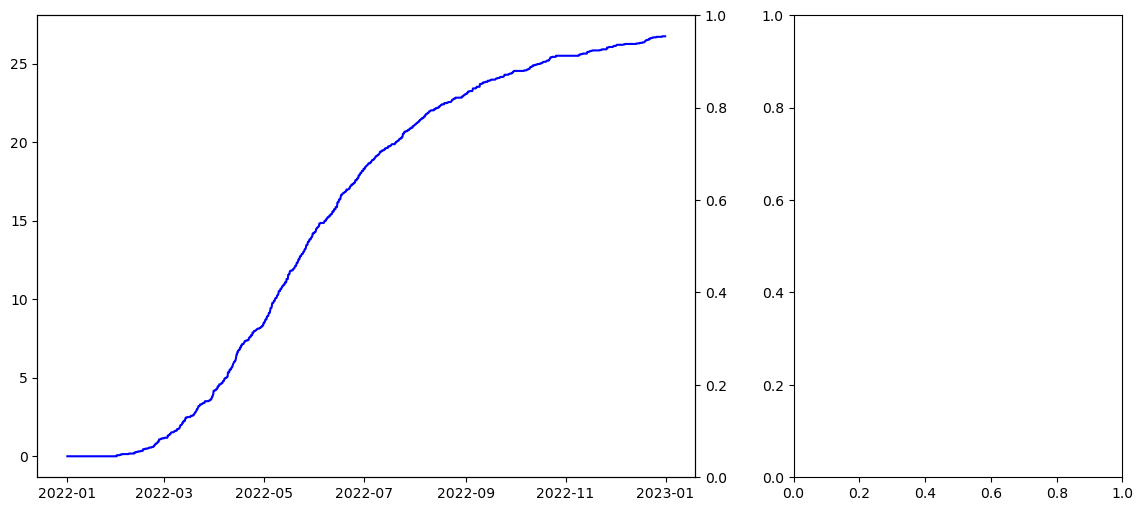

In [23]:
plt.rcParams.update({'font.size': 10})
#
fig, ax = plt.subplots(1,2,figsize = (14,6), gridspec_kw={'width_ratios': [2, 1]})
ax[0].plot(data.time[0,:], p_status_7*100, 'b', label = 'Left the System Through JdF')
axis = ax[0].twinx()
axis.plot(data.time[0,:], p_haro*100,'r', label = 'Through Haro Strait')
axis.plot(data.time[0,:], p_m_region*100,'g', label = 'Through Mixing Region')
#
ax[1].pcolormesh(mask['nav_lon'], mask['nav_lat'], mask['tmask'][0][0], cmap = cmap)
ax[1].scatter(out_jdf.lon, out_jdf.lat, c = 'b', s = 1, alpha = .05)
ax[1].scatter(haro.lon, haro.lat, c = 'r', s = 1, alpha = .05)
ax[1].scatter(m_region.lon, m_region.lat, c = 'g', s = 1, alpha = .05)
ax[1].set_ylabel('Latitude')
ax[1].set_xlabel('Longitude')

ax[0].legend()
ax[0].set_ylabel('Percentage (%)')
axis.set_ylabel('Percentage (%)')
plt.tight_layout()

In [ ]:
def final_particle_summary_df(data):
    #
    total = data.dims['trajectory']
    final_index = -1  # Last time step

    status_f = data.status[:, final_index].values
    lat_f = data.lat[:, final_index].values
    lon_f = data.lon[:, final_index].values

    valid_status = np.isfinite(status_f)
    valid_pos = np.isfinite(lat_f) & np.isfinite(lon_f)

    # Create masks
    masks = {
        'Initial': (status_f < 0) & valid_status,
        'Sewage in water': (status_f == 1),
        'Colloidal in water': (status_f == 2),
        'Marine in water': (status_f == 3),
        'Sewage in sediment': (status_f == 11),
        'Colloidal in sediment': (status_f == 12),
        'Marine in sediment': (status_f == 13),
        'Particles out': (status_f == 7),
        'Status 7 in zone': (status_f == 7) & (lat_f < 48.7) & (lon_f < -124.66),
        'Passed through Haro': (lat_f >= 48.43) & (lat_f <= 48.46) & (lon_f >= -123.4) & (lon_f <= -123),
        'Passed through M region': (lat_f > 48.43) & (lat_f < 48.46) & (lon_f > -123),
    }

    # Build dataframe
    rows = []
    for label, mask in masks.items():
        count = np.count_nonzero(mask)
        percent = 100 * count / total
        rows.append({'Category': label, 'Count': count, 'Percent': round(percent, 2)})

    df = pd.DataFrame(rows).sort_values('Category').reset_index(drop=True)
    return df


In [ ]:
summary_df = final_particle_summary_df(datitos)
print(summary_df)